![Title](1581082482(1).jpg)

![Title](1581082533(1).jpg)

In [1]:
'''此时此刻，所有可能影响我们的超平面的样本可能都会被定义为支持向量，所以支持向量就不再是所有压在虚线超平面上的点，而是
所有可能影响我们的超平面的位置的那些混杂在彼此的类别中的点了。观察一下我们对不同数据集分类时，支持向量都有哪些？软间隔如
何影响了超平面和支持向量，就一目了然了'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
]

Kernel = ["linear"]

#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
    
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(10,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    for est_idx, kernel in enumerate(Kernel):
        ax = axes[ds_cnt, est_idx + 1]
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        ax.scatter(X[:, 0], X[:, 1], c=Y
                   ,zorder=10
                   ,cmap=plt.cm.Paired,edgecolors='k')
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100
                   ,facecolors='none', zorder=10, edgecolors='white') #白色的圈为支持向量
        
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                   levels=[-1, 0, 1])
        
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
                , size=15
                , bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                , transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                , horizontalalignment='right' #位于坐标轴的什么方向 
               )
plt.tight_layout()
plt.show()

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 500x400 with 1 Axes>

<Figure size 1000x1600 with 8 Axes>

白色圈圈出的就是我们的支持向量，可以看到,所有在两条虚线超平面之间的点，和虚线超平面外，但属于另一个类别的点，都被我们认为是支持向量。并不是因为这些点都在我们的超平面上，而是因为我们的超平面由所有的这些点来决定，我们可以通过调节C来移动我们的超平面，让超平面过任何一个白色圈圈出的点。参数C就是这样影响了我们的决策，可以说是彻底改变了支持向量机的决策过程。

## 二分类SVC中的样本不均衡问题：重要参数class_weight

对于分类问题，永远都逃不过的一个痛点就是样本不均衡问题。样本不均衡是指在一组数据集中，标签的一类天生占有很大的比例，但我们有着捕捉出某种特定的分类的需求的状况。比如，我们现在要对潜在犯罪者和普通人进行分类，潜在犯罪者占总人口的比例是相当低的，也许只有2%左右，98%的人都是普通人，而我们的目标是要捕获出潜在犯罪者。这样的标签分布会带来许多问题。

SVC的参数：class_weight

可输入字典或者"balanced”，可不填，默认None 对SVC，将类i的参数C设置为class_weight [i] * C。如果没有给出具体的class_weight，则所有类都被假设为占有相同的权重1，模型会根据数据原本的状况去训练。如果希望改善样本不均衡状况，请输入形如{"标签的值1"：权重1，"标签的值2"：权重2}的字典，则参数C将会自动被设为：标签的值1的C：权重1 * C，标签的值2的C：权重2*C或者，可以使用“balanced”模式，这个模式使用y的值自动调整与输入数据中的类频率成反比的权重为n_samples/(n_classes * np.bincount(y))

SVC的接口fit的参数：sample_weight （必须输入每个样本的权重）

数组，结构为 (n_samples, )，必须对应输入fit中的特征矩阵的每个样本每个样本在fit时的权重，让权重 * 每个样本对应的C值来迫使分类器强调设定的权重更大的样本。通常，较大的权重加在少数类的样本上，以迫使模型向着少数类的方向建模通常来说，这两个参数我们只选取一个来设置。如果我们同时设置了两个参数，则C会同时受到两个参数的影响，即 class_weight中设定的权重 * sample_weight中设定的权重 * C

一般两个参数只设置一个

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

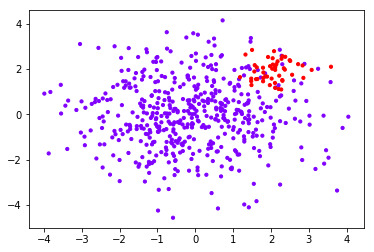

In [3]:
class_1 = 500 #类别1有500个样本 10:1
class_2 = 50 #类别2有50个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std, #方差 可以通过这个来控制数据的分散情况
                  random_state=0, 
                  shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类

In [4]:
X.shape

(550, 2)

在数据集上分别建模

In [5]:
#不设定class_weight
clf = svm.SVC(kernel='linear',C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
#设定class_weight
wclf = svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
#给两个模型分别打分看看，这个分数是accuracy准确度
#做样本均衡之前，我们的准确率下降了，没有样本的准确率更高
clf.score(X,y)

0.9418181818181818

In [8]:
wclf.score(X,y)

0.9127272727272727

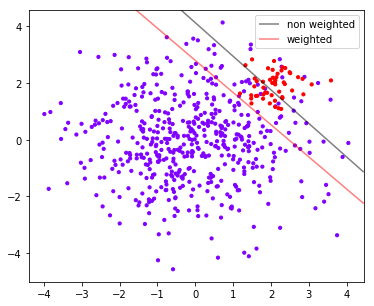

In [9]:
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow',s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
  
xy = np.vstack([XX.ravel(), YY.ravel()]).T

#第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape) #没有class_weight的决策边界
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-']) #没有class_weight的等高线
#level=[0] 距离决策边界为0的等高线

Z_wclf = wclf.decision_function(xy).reshape(XX.shape) #有class_weight的决策边界
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-']) #有class_weight的等高线

#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],loc="upper right")
plt.show()

In [10]:
'''图例这一步是如何做到的？'''
a.collections #调用这个等高线对象中画的所有线，返回一个惰性对象

<a list of 1 mcoll.LineCollection objects>

In [11]:
#用[*]把它打开试试看
[*a.collections] #返回的是一个linecollection对象，其实就是我们等高线里所以的线的列表

In [12]:
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象
a.collections[0]

plt.legend([对象列表],[图例列表],loc)

只要对象列表和图例列表相对应，就可以显示出图例

In [13]:
'''从图像上可以看出，灰色是我们做样本平衡之前的决策边界。灰色线上方的点被分为一类，下方的点被分为另一类。可以看到，
大约有一半少数类（红色）被分错，多数类（紫色点）几乎都被分类正确了。红色是我们做样本平衡之后的决策边界，同样是红色线
上方一类，红色线下方一类。可以看到，做了样本平衡后，少数类几乎全部都被分类正确了，但是多数类有许多被分错了。'''

'从图像上可以看出，灰色是我们做样本平衡之前的决策边界。灰色线上方的点被分为一类，下方的点被分为另一类。可以看到，\n大约有一半少数类（红色）被分错，多数类（紫色点）几乎都被分类正确了。红色是我们做样本平衡之后的决策边界，同样是红色线\n上方一类，红色线下方一类。可以看到，做了样本平衡后，少数类几乎全部都被分类正确了，但是多数类有许多被分错了。'

In [14]:
print('没有class_weight的分数：{}'.format(clf.score(X,y)))
print('有class_weight的分数：{}'.format(wclf.score(X,y)))

没有class_weight的分数：0.9418181818181818
有class_weight的分数：0.9127272727272727


可以看出，从准确率的角度来看，不做样本平衡的时候准确率反而更高，做了样本平衡准确率反而变低了，这是因为做了样本平衡后，为了要更有效地捕捉出少数类，模型误伤了许多多数类样本，而多数类被分错的样本数量 > 少数类被分类正确的样本数量，使得模型整体的精确性下降。现在，如果我们的目的是模型整体的准确率，那我们就要拒绝样本平衡，使用class_weight被设置之前的模型。

然而在现实中，我们往往都在追求捕捉少数类，因为在很多情况下，将少数类判断错的代价是巨大的。比如我们之前提到的，判断潜在犯罪者和普通人的例子，如果我们没有能够识别出潜在犯罪者，那么这些人就可能去危害社会，造成恶劣影响，但如果我们把普通人错认为是潜在犯罪者，我们也许只是需要增加一些监控和人为甄别的成本。所以对我们来说，我们宁愿把普通人判错，也不想放过任何一个潜在犯罪者。我们希望不惜一切代价来捕获少数类，或者希望捕捉出尽量多的少数类，那我们就必须使用class_weight设置后的模型。

# SVC 的模型评估指标

单纯地追求捕捉出少数类，就会成本太高，而不顾及少数类，又会无法达成模型的效果。所以在现实中，我们往往在寻找捕获少数类的能力和将多数类判错后需要付出的成本的平衡。如果一个模型在能够尽量捕获少数类的情况下，还能够尽量对多数类别判断正确，则这个模型就非常优秀了。

捕捉少数类的艺术：精确度，召回率和F1 score

![Title](1581177596(1).png)

In [15]:
'''追求高精确度Precision是因为把多数类判断错误的成本非常高，不想把多数类错误的判定成少数类'''
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.7142857142857143

In [16]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5102040816326531

![Title](1581177784(1).jpg)

In [17]:
'''如果我们希望不计一切代价，找出少数类（比如找出潜在犯罪者），那我们就追求高召回率'''
'''召回率越高表示我们竟可能找回了多数的少数类 分数低则表示没有捕捉到足够的少数类'''
#所有predict为1的点 / 全部为1的点的比例
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(y == 1).sum()

0.6

In [18]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(y == 1).sum()

1.0

可以看出，做样本平衡之前，我们只成功捕获了60%左右的少数类点，而做了样本平衡之后的模型，捕捉出了100%的少数类点，从图像上来看，我们的红色决策边界的确捕捉出了全部的少数类，而灰色决策边界只捕捉到了一半左右。召回率可以帮助我们判断，我们是否捕捉除了全部的少数类，所以又叫做查全率。如果我们希望不计一切代价，找出少数类（比如找出潜在犯罪者的例子），那我们就会追求高召回率，相反如果我们的目标不是尽量捕获少数类，那我们就不需要在意召回率。

![Title](1581178649(1).jpg)

## 判错多数类的考量：特异度与假正率

![Title](1581180835(1).jpg)

In [19]:
#所有被正确预测为0的样本 / 所有的0样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 0).sum()/(y == 0).sum()

0.976

In [20]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 0).sum()/(y == 0).sum()

0.904

![Title](1581180942(1).jpg)

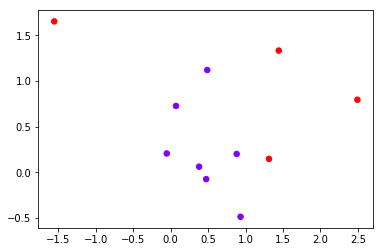

In [21]:
#自建数据集
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]] #中心点
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_, class_2_] #方差
                    ,centers=centers_
                    ,cluster_std=clusters_std
                    ,random_state=0, shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)

In [22]:
#建模 调用概率
from sklearn.linear_model import LogisticRegression as LogiR

clf_lo = LogiR().fit(X_,y_)

prob = clf_lo.predict_proba(X_) #调用概率
prob #十一行两列的数组 代表每个样本在类别0和类别1下的概率

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.60466356, 0.39533644],
       [0.45891589, 0.54108411],
       [0.71798647, 0.28201353],
       [0.67910911, 0.32089089],
       [0.66473898, 0.33526102],
       [0.56277457, 0.43722543],
       [0.66205409, 0.33794591],
       [0.35516738, 0.64483262],
       [0.38160618, 0.61839382],
       [0.58528378, 0.41471622],
       [0.50149311, 0.49850689]])

In [23]:
#将样本和概率放到一个Dataframe中
import pandas as pd
prob = pd.DataFrame(prob)
prob.columns = ['0','1']
prob

,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [24]:
#使用阈值0.5，大于0.5的样本被预测为1，小于0.5的样本被预测为0
#手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0
        
prob['y_true'] = y_
prob = prob.sort_values(by='1',ascending=False)#根据1这一列排序 概率越大的排在越前面 ascending = False 不要逆序
prob

,0,1,pred,y_true
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
1,0.458916,0.541084,1.0,0
10,0.501493,0.498507,0.0,1
5,0.562775,0.437225,0.0,0
9,0.585284,0.414716,0.0,1
0,0.604664,0.395336,0.0,0
6,0.662054,0.337946,0.0,0
4,0.664739,0.335261,0.0,0
3,0.679109,0.320891,0.0,0


In [25]:
#使用混淆举证查看结果
from sklearn.metrics import confusion_matrix as CM,precision_score as P,recall_score as R

CM(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0]) #真实值 预测值 标签 1是少数类0是多数类

array([[2, 2],
       [1, 6]], dtype=int64)

In [26]:
P(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0]) #Precision

0.6666666666666666

In [27]:
R(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0]) #Recall

0.5

In [28]:
'''如果使用0.4作为阈值'''
clf_lo = LogiR().fit(X_,y_)

prob = clf_lo.predict_proba(X_) #调用概率

prob = pd.DataFrame(prob)
prob.columns = ['0','1']

for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0
        
prob['y_true'] = y_
prob = prob.sort_values(by='1',ascending=False)#根据1这一列排序 概率越大的排在越前面 ascending = False 不要逆序

print('confusion_matrix:{}'.format(CM(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0])))

print('precision:{}'.format(P(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0])))

print('recall:{}'.format(R(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels=[1,0])))

confusion_matrix:[[4 0]
 [2 5]]
precision:0.6666666666666666
recall:1.0


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 注意，降低或者升高阈值并不一定能够让模型的效果变好，一切都是基于我们要追求怎样的模型效果(通常来说降低阈值能够升高recall)

## SVM实现概率预测：重要参数probability,接口predict_proba以及decision_function

我们在画等高线，也就是决策边界的时候曾经使用SVC的接口decision_function，它返回我们输入的特征矩阵中每个样本到划分数据集的超平面的距离。我们在SVM中利用超平面来判断我们的样本，本质上来说，当两个点的距离是相同的符号的时候，越远离超平面的样本点归属于某个标签类的概率就很大。比如说，一个距离超平面0.1的点，和一个距离超平面100的点，明显是距离为0.1的点更有可能是负类别的点混入了边界。同理，一个距离超平面距离为-0.1的点，和一个离超平面距离为-100的点，明显是-100的点的标签更有可能是负类。所以，到超平面的距离一定程度上反应了样本归属于某个标签类的可能性。接口decision_function返回的值也因此被我们认为是SVM中的置信度

不过，置信度始终不是概率，它没有边界，可以无限大，大部分时候也不是以百分比或者小数的形式呈现，而SVC的判断过程又不像决策树一样可以求解出一个比例。为了解决这个矛盾，SVC有重要参数probability

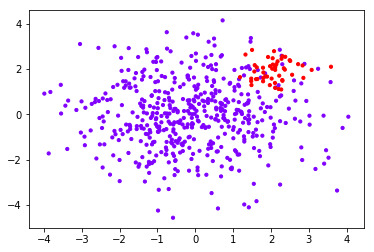

In [29]:
'''probability 布尔值，可不填 默认False
是否启用概率估计，进行必须在调用fit之前启用它，启用此功能会减慢SVM的运算速度
设置为True则会启动，启用之后，SVC的接口 predict_proba和predict_log_proba将生效'''

#使用最初的X和y，样本不均衡的这个模型
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散

X, y = make_blobs(n_samples=[class_1, class_2]
                  ,centers=centers
                  ,cluster_std=clusters_std
                  ,random_state=0
                  , shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
#其中红色点是少数类，紫色点是多数类

In [30]:
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)

In [31]:
 clf_proba.predict_proba(X) #生成的各类标签下的概率

array([[0.69420257, 0.30579743],
       [0.28063967, 0.71936033],
       [0.96139583, 0.03860417],
       ...,
       [0.17036806, 0.82963194],
       [0.37176377, 0.62823623],
       [0.33358644, 0.66641356]])

In [32]:
clf_proba.decision_function(X) #返回一个一维数组  每个点到决策边界的距离

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

毋庸置疑，Platt缩放中涉及的交叉验证对于大型数据集来说非常昂贵，计算会非常缓慢。另外，由于Platt缩放的理论原因，在二分类过程中，有可能出现predict_proba返回的概率小于0.5，但样本依旧被标记为正类的情况出现，毕竟支持向量机本身并不依赖于概率来完成自己的分类。如果我们的确需要置信度分数，但不一定非要是概率形式的话，那建议可以将probability设置为False，使用decision_function这个接口而不是predict_proba

### 绘制SVM的ROC曲线 
ROC是一条以不同阈值下的假正率FPR为横坐标，不同阈值下的召回率Recall为纵坐标的曲线

In [33]:
#首先来看看如何从混淆矩阵中获取FPR和Recall

cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm #混淆矩阵

array([[4, 0],
       [2, 5]], dtype=int64)

In [34]:
#FPR 被我们预测错误0占所有真正为0的样本的比例
cm[1,0]/cm[1,:].sum()

0.2857142857142857

In [35]:
#Recall
cm[0,0]/cm[0,:].sum()

1.0

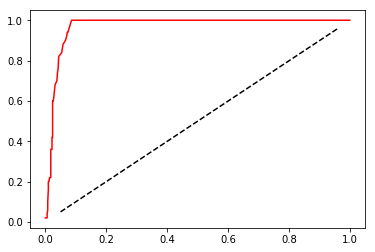

In [36]:
#概率 clf_proba.predict_proba(X)[:,1] 我的类别1下的概率
#阈值 ROC横坐标是不同阈值下的假正率 纵坐标是不同阈值下的Recall 每一个阈值都对应一个循环，每一个循环都要有一个混淆矩阵，都要都一组假正率和recall
#阈值的范围在概率最小值和概率最大值中取适当的点 最大值不要被取到

#开始绘图
recall = []
FPR = []

probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min(),clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False) #endpoint=False 不要取到最大值

from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot

for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i: #这一行1下的概率是不是大于我们设定的阈值i
            y_predict.append(1) #如果大于添加1
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0]) #混淆矩阵
    recall.append(cm[0,0]/cm[0,:].sum()) 
    FPR.append(cm[1,0]/cm[1,:].sum())
    
recall.sort()
FPR.sort()
plt.plot(FPR,recall,c="red") #横坐标假正率 纵坐标recall
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--") #y=x 的横跨整个图像的中间线
plt.show()

现在我们就画出了ROC曲线了，那我们如何理解这条曲线呢？先来回忆一下，我们建立ROC曲线的根本目的是找寻Recall和FPR之间的平衡，让我们能够衡量模型在尽量捕捉少数类的时候，误伤多数类的情况会如何变化。横坐标是FPR，代表着模型将多数类判断错误的能力，纵坐标Recall，代表着模型捕捉少数类的能力，所以ROC曲线代表着，随着Recall的不断增加，FPR如何增加。我们希望随着Recall的不断提升，FPR增加得越慢越好，这说明我们可以尽量高效地捕捉出少数类，而不会将很多地多数类判断错误。所以，我们希望看到的图像是，纵坐标急速上升，横坐标缓慢增长，也就是在整个图像左上方的一条弧线。这代表模型的效果很不错，拥有较好的捕获少数类的能力。

中间的虚线代表着，当recall增加1%，我们的FPR也增加1%，也就是说，我们每捕捉出一个少数类，就会有一个多数类被判错，这种情况下，模型的效果就不好，这种模型捕获少数类的结果，会让许多多数类被误伤，从而增加我们的成本。ROC曲线通常都是凸型的。对于一条凸型ROC曲线来说，曲线越靠近左上角越好，越往下越糟糕，曲线如果在虚线的下方，则证明模型完全无法使用。但是它也有可能是一条凹形的ROC曲线。对于一条凹型ROC曲线来说，应该越靠近右下角越好，凹形曲线代表模型的预测结果与真实情况完全相反，那也不算非常糟糕，只要我们手动将模型的结果逆转，就可以得到一条左上方的弧线了。最糟糕的就是，无论曲线是凹形还是凸型，曲线位于图像中间，和虚线非常靠近，那我们拿它无能为力。

### sklearn中的ROC曲线和AUC面积

![Title](1581249876(1).jpg)

In [37]:
from sklearn.metrics import roc_curve

FPR,recall,thresholds = roc_curve(y,clf_proba.decision_function(X),pos_label=1) #返回假正率，recall，以及阈值

In [38]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [39]:
recall.shape

(45,)

In [40]:
thresholds #此时的thresholds就不是一个概率值，而是距离值中的阈值了，所以它可以大于1，也可以为负

array([  3.18236076,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [41]:
thresholds.shape #decision_function 距离

(45,)

In [42]:
'''AUC面积'''
from sklearn.metrics import roc_auc_score as AUC

AUC(y,clf_proba.decision_function(X)) #clf_proba是开启概率值的SVM 越接近1越好

0.9696400000000001

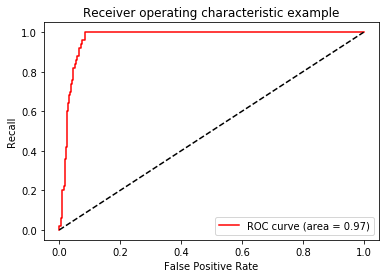

In [43]:
area = AUC(y,clf_proba.decision_function(X)) #clf_proba是开启概率值的SVM
plt.figure()
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])#x轴坐标范围
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 利用ROC曲线求解最佳阈值
现在，有了ROC曲线，了解了模型的分类效力，以及面对样本不均衡问题时的效力，那我们如何求解我们最佳的阈值呢？我们想要了解，什么样的状况下我们的模型的效果才是最好的。回到我们对ROC曲线的理解来：ROC曲线反应的是recall增加的时候FPR如何变化，也就是当模型捕获少数类的能力变强的时候，会误伤多数类的情况是否严重。我们的希望是，模型在捕获少数类的能力变强的时候，尽量不误伤多数类，也就是说，随着recall的变大，FPR的大小越小越好。所以我们希望找到的最有点，其实是Recall和FPR差距最大的点。这个点，又叫做约登指数。

In [44]:
maxindex = (recall - FPR).tolist().index(max(recall - FPR)) #返回最大值在list中的索引
thresholds[maxindex] #decision function生成的置信度来说 最佳阈值

-1.0860191749391461

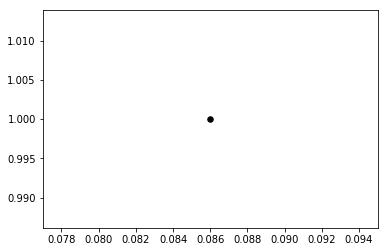

In [45]:
#我们可以在图像上来看看这个点在哪里
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)

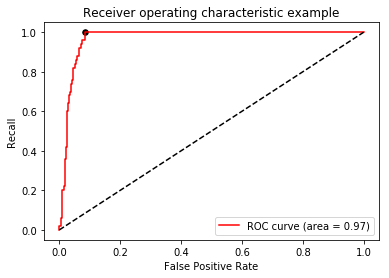

In [46]:
#把上述代码放入这段代码中：
plt.figure()
plt.plot(FPR, recall, color='red',label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.scatter(FPR[maxindex],recall[maxindex],c="black",s=30)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

最佳阈值就这样选取出来了，由于现在我们是使用decision_function来画ROC曲线，所以我们选择出来的最佳阈值其实是最佳距离。如果我们使用的是概率，我们选取的最佳阈值就会使一个概率值了。只要我们让这个距离/概率以上的点，都为正类，让这个距离/概率以下的点都为负类，模型就是最好的：即能够捕捉出少数类，又能够尽量不误伤多数类，整体的精确性和对少数类的捕捉都得到了保证

### SVC处理多分类问题：重要参数decision_function_shape

之前所有的SVM内容，全部是基于二分类的情况来说明的，因为支持向量机是天生二分类的模型。不过，它也可以做多分类，但是SVC在多分类情况上的推广，属于恶魔级别的难度，要从数学角度去理解几乎是不可能的，因为要研究透彻多分类状况下的SVC，就必须研究透彻多分类时所需要的决策边界个数，每个决策边界所需要的支持向量的个数，以及这些支持向量如何组合起来计算我们的拉格朗日乘数，要求我们必须对SMO或者梯度下降求解SVC的拉格朗日乘数的过程十分熟悉。这些内容推广到多分类之后，即便在线性可分的二维数据上都已经复杂，要再推广到非线性可分的高维情况，就远远超出了我们这个课程的要求。

sklearn中用了许多巧妙的方法来为我们呈现结果，在这里，这一小节会为大家简单介绍sklearn当中是如何SVC的多分类问题的，但需要注意，这一节的内容只是一个简介，并不能带大家深入理解多分类中各种深奥的情况。大家可根据自己的需求酌情选读。

支持向量机是天在生二分类的模型，所以支持向量机在处理多分类问题的时候，是把多分类问题转换成了二分类问题来解决。这种转换有两种模式，一种叫做“一对一”模式（one vs one），一种叫做“一对多”模式(one vs rest)。

# SVC真实数据案例：预测明天是否会下雨

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [48]:
weather = pd.read_csv('weatherAUS5000 .csv',index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


In [49]:
#把特征矩阵和标签分开
X = weather.iloc[:,:-1] #所有行 从第一列到最后一列
Y = weather.iloc[:,-1] #所有行 最后一列

In [50]:
#分裂的快捷键 ctrl shift -
#合并快捷键 shift M

In [51]:
X.shape

(5000, 21)

In [52]:
#探索数据类型
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4979 non-null float64
MaxTemp          4987 non-null float64
Rainfall         4950 non-null float64
Evaporation      2841 non-null float64
Sunshine         2571 non-null float64
WindGustDir      4669 non-null object
WindGustSpeed    4669 non-null float64
WindDir9am       4651 non-null object
WindDir3pm       4887 non-null object
WindSpeed9am     4949 non-null float64
WindSpeed3pm     4919 non-null float64
Humidity9am      4936 non-null float64
Humidity3pm      4880 non-null float64
Pressure9am      4506 non-null float64
Pressure3pm      4504 non-null float64
Cloud9am         3111 non-null float64
Cloud3pm         3012 non-null float64
Temp9am          4967 non-null float64
Temp3pm          4912 non-null float64
dtypes: float64(16), object(5)
memory usage: 859.4+ KB


In [53]:
#探索缺失值
'''缺失的比例不同，我们要有不用的填补缺失值的策略'''
X.isnull().mean() #缺失值所占总之的比例 isnull().sum()(全部的True)/X.shape[0]

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [54]:
#删除一个cell Esc d d
#在上方添加一个cell Esc a Enter
#在下方添加一个cell Esc b Enter

In [55]:
#探索标签的分类
np.unique(Y)#我们的标签是二分类

array(['No', 'Yes'], dtype=object)

##### 分训练集和测试集，并做描述性统计

在现实中，我们会先分训练集和测试集，再开始进行数据预处理。这是由于，测试集在现实中往往是不可获得的，或者被假设为是不可获得的，我们不希望我们建模的任何过程受到测试集数据的影响，否则的话，就相当于提前告诉了模型一部分预测的答案。在之前的课中，为了简便操作，都给大家忽略了这个过程，一律先进行预处理，再分训练集和测试集，这是一种不规范的做法。在这里，为了让案例尽量接近真实的样貌，所以采取了现实中所使用的这种方式：先分训练集和测试集，再一步步进行预处理。这样导致的结果是，我们对训练集执行的所有操作，都必须对测试集执行一次，工作量是翻倍的

In [56]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)

#恢复索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
          i.index = range(i.shape[0]) 

In [57]:
#是否有样本不平衡问题  是指标签中某一类天生占有很大比例
Ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [58]:
Ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [59]:
#将标签编码
from sklearn.preprocessing import LabelEncoder #标签专用
encorder = LabelEncoder().fit(Ytrain) #允许一维数据输入

#使用训练集进行训练，然后在训练集和测试集上分别进行transform
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))
'''如果在测试集中，出现了训练集中没有出现过的类别标签 则会报错'''

'如果在测试集中，出现了训练集中没有出现过的类别标签 则会报错'

In [60]:
'''描述性统计 处理异常值 观察是否有偏态'''
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [61]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


#### 处理困难特征：日期

In [62]:
#我们现在拥有的日期特征，是连续型特征，还是分类型变量
#日期是一年分了365类的分类型变量
#需要判断我们的日期特征中，日期是否有重复

In [63]:
Xtrain.iloc[:,0].value_counts()
#首先，日期不是独一无二的，日期有重复
#其次，在我们分训练集和测试集之后，日期也不是连续的，而是分散的
#某一年的某一天倾向于会下雨？或者倾向于不会下雨？
#不是日期影响了下雨与否，反而更多的是这一天的日照时间，湿度，温度等等这些因素影响了是否会下雨
#光看日期，其实感觉它对我们的判断并无直接影响
#如果我们把它当做连续型变量处理，那算法会认为它是一系列1~3000左右的数字 ，不会意识到这是日期

2015-10-12    6
2014-05-16    6
2015-07-03    6
2012-09-18    5
2013-12-20    5
2011-09-04    5
2011-07-19    5
2010-11-03    5
2014-03-12    5
2010-05-18    5
2011-11-04    5
2014-07-26    5
2012-11-23    5
2014-06-16    5
2017-01-09    5
2014-02-12    5
2012-07-18    5
2016-11-01    5
2016-09-07    5
2009-06-29    5
2009-07-17    5
2009-03-30    5
2009-08-23    4
2012-05-02    4
2014-08-17    4
2012-04-19    4
2010-12-07    4
2013-04-03    4
2016-11-14    4
2012-09-23    4
             ..
2016-04-27    1
2016-07-10    1
2014-02-17    1
2015-08-02    1
2010-10-11    1
2011-01-22    1
2012-01-02    1
2010-09-11    1
2015-06-26    1
2012-01-16    1
2015-08-01    1
2016-11-04    1
2014-10-12    1
2013-04-04    1
2016-02-24    1
2017-06-11    1
2013-07-13    1
2016-05-13    1
2010-10-27    1
2016-10-02    1
2015-01-13    1
2014-11-18    1
2011-03-27    1
2014-08-21    1
2010-09-05    1
2015-09-06    1
2009-11-08    1
2014-05-07    1
2009-04-16    1
2011-10-08    1
Name: Date, Length: 2141

In [64]:
Xtrain.iloc[:,0].value_counts().count()
#如果我们把它当作分类型变量处理，类别太多，有2141类，如果换成数值型，会被直接当成连续型变量，如果变成哑变量，我们的特征的维度会爆炸

2141

In [65]:
Xtrainc = Xtrain.copy()

In [66]:
Xtrainc.sort_values(by="Location")
#我们的数据是不同地点上相似的时间的数据

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2796,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,13.0,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7
2975,2012-08-17,Adelaide,7.8,13.2,17.6,0.8,NaN,SW,61.0,SW,...,20.0,28.0,76.0,47.0,1012.5,1014.7,NaN,NaN,8.3,12.5
775,2013-03-16,Adelaide,17.4,23.8,NaN,NaN,9.7,SSE,46.0,S,...,9.0,19.0,63.0,57.0,1019.9,1020.5,NaN,NaN,19.1,20.7
861,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4
2900,2009-09-17,Adelaide,14.2,17.4,8.8,2.0,7.1,SW,41.0,SSW,...,15.0,20.0,82.0,56.0,1014.9,1018.0,NaN,NaN,16.2,16.7
902,2008-12-10,Adelaide,14.2,28.0,0.0,6.4,12.5,SE,48.0,E,...,13.0,13.0,56.0,35.0,1010.8,1008.9,NaN,NaN,19.3,25.6
919,2011-10-12,Adelaide,7.7,19.9,0.0,3.4,11.4,W,30.0,E,...,13.0,15.0,56.0,43.0,1021.2,1018.1,NaN,NaN,14.1,19.4
936,2014-03-11,Adelaide,22.3,32.2,0.4,20.6,3.2,W,65.0,ESE,...,9.0,9.0,53.0,78.0,1017.0,1017.2,NaN,NaN,25.6,22.8
942,2015-02-23,Adelaide,20.6,26.5,0.0,16.2,NaN,SSE,48.0,S,...,20.0,22.0,61.0,43.0,1015.3,1016.5,NaN,NaN,22.2,25.7


In [67]:
Xtrain.loc[Xtrain.iloc[:,0]=='2015-08-24',:] #日期等于2015-08-24的所有日期的数据 loc是根据名字索引 iloc是跟做数字查找
#不同的地点在相同的时间的数据 所以时间存在重复量

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4


In [68]:
'''我们可以将时间对气候的连续影响，转换为 今天是否下雨 这个特征，巧妙地将样本对应标签之间的联系，转换成是特征与标签之间的联系了'''
Xtrain["Rainfall"].head(20)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.2
8      0.0
9      0.2
10     1.0
11     0.0
12     0.2
13     0.0
14     0.0
15     3.0
16     0.2
17     0.0
18    35.2
19     0.0
Name: Rainfall, dtype: float64

In [69]:
Xtrain['Rainfall'].isnull().sum()
#空值的个数

33

In [70]:
Xtrain.loc[Xtrain.loc[:,"Rainfall"] >= 1,"RainToday"] = "Yes" #我们规定大于1毫米 算是今天下雨
Xtrain.loc[Xtrain.loc[:,"Rainfall"] < 1,"RainToday"] = "No" #我们规定小于1毫米的 算是今天没下雨
Xtrain.loc[Xtrain.loc[:,"Rainfall"] == np.nan,"RainToday"] = np.nan #如果降雨量为空值 则RainToday也为空值

D:\anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [71]:
#对测试集也进行相同的修稿
Xtest.loc[Xtest.loc[:,"Rainfall"] >= 1,"RainToday"] = "Yes" #我们规定大于1毫米 算是今天下雨
Xtest.loc[Xtest.loc[:,"Rainfall"] < 1,"RainToday"] = "No" #我们规定小于1毫米的 算是今天没下雨
Xtest.loc[Xtest.loc[:,"Rainfall"] == np.nan,"RainToday"] = np.nan #如果降雨量为空值 则RainToday也为空值

In [72]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-01-23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,2009-03-05,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,2010-03-05,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,2016-11-28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


In [73]:
'''我们可以对日期进行分组，得到季节 季节对天气下雨会有影响'''
int(Xtrain.loc[0,"Date"].split("-")[1]) #提取出月份

8

In [74]:
Xtrain.loc[:,"Date"] = Xtrain.loc[:,"Date"].apply(lambda x:int(x.split("-")[1])) #apply是对dataframe上的某一列进行处理的函数 lambda是匿名函数
#替换完毕后，我们需要修改列的名称
#rename是比较少有的，可以用来修改单个列名的函数
#我们通常都直接使用 df.columns = 某个列表这样的形式来一次修改所有的列名
#但rename允许我们只修改某个单独的列
Xtrain = Xtrain.rename(columns={"Date":"Month"})
Xtrain.head() #这个时候date这一列变成了month 只保留了月份的数值

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [75]:
#对测试集进行同样的操作
Xtest.loc[:,"Date"] = Xtest.loc[:,"Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})
Xtest.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,Yes
2,3,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


### 处理困难特征：地点

我们的样本中含有49个不同地点，如果做成分类型变量，算法就无法辨别它究竟是否是分类变量。也就是说，我们需要让算法意识到，不同的地点因为气候不同，所以对“明天是否会下雨”有着不同的影响。如果我们能够将地点转换为这个地方的气候的话，我们就可以将不同城市打包到同一个气候中，而同一个气候下反应的降雨情况应该是相似的。

In [76]:
cityll = pd.read_csv(r'cityll .csv',index_col=0)
city_climate = pd.read_csv(r'Cityclimate .csv')

In [77]:
cityll.head() #每个城市对应的经纬度，这些城市是澳大利亚统计局做的那张地图上的城市

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [78]:
city_climate.head() #澳大利亚统计局做的每个城市的气候

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


In [79]:
#去掉度数符号
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1])) #切片 切掉最后的度数符号
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))

In [80]:
#观察一下所有的经纬度方向都是一致的，全部是南纬，东经，因为澳大利亚在南半球，东半球
#所以经纬度的方向我们可以舍弃了
citylld = cityll.iloc[:,[0,5,6]]#去除第0,5,6列 

In [81]:
citylld.head()

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807


In [82]:
#将city_climate 中的气候添加到我们的citylld中
citylld['climate'] = city_climate.iloc[:,-1]

citylld.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [83]:
citylld.loc[:,'climate'].value_counts() #返回了共七种气候类型

Hot dry summer, cool winter          24
Warm temperate                       18
Hot dry summer, warm winter          18
High humidity summer, warm winter    17
Mild temperate                        9
Cool temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64

In [84]:
'''我们如果想要计算距离，我们就会需要所有样本数据中的城市。我们认为，只有出现在训练集中的地点才会出现在测试集中，基于这样的假设，数据在samplecity.csv中'''
samplecity = pd.read_csv(r"samplecity .csv",index_col=0)

#我们对samplecity也执行同样的处理：去掉经纬度中度数的符号，并且舍弃我们的经纬度的方向
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]

samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


我们现在有了澳大利亚主要城市的经纬度和对应的气候，也有了我们的样本的地点所对应的经纬度，接下来我们要开始计算我们样本上的地点到每个澳大利亚主要城市的距离，而离我们的样本地点最近的那个澳大利亚主要城市的气候，就是我们样本点的气候。

In [85]:
from math import radians , sin,cos, acos

citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))

samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    #每次计算后，取距离最近的城市，然后将最近的城市和城市对应的气候都匹配到samplecityd中
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


In [86]:
#查看最后的结果，需要检查城市匹配是否基本正确
samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [87]:
#查看气候的分布
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [88]:
#确认无误后，取出样本城市所对应的气候，并保存
locafinal = samplecityd.iloc[:,[0,-1]]

locafinal.head()

,City,climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [89]:
locafinal.columns = ["Location","Climate"] #位置 和气候

In [90]:
#在这里设定locafinal的索引为地点，是为了之后进行map的匹配
locafinal = locafinal.set_index(keys='Location')

locafinal #地点就变成了索引

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate
Brisbane,"Warm humid summer, mild winter"
Adelaide,Warm temperate
Bendigo,Cool temperate
Townsville,"High humidity summer, warm winter"


In [91]:
locafinal.to_csv(r'samplelocation.csv')

有了每个样本城市所对应的气候，我们接下来就使用气候来替掉原本的城市，原本的气象站的名称。在这里，我们可以使用map功能，map能够将特征中的值一一对应到我们设定的字典中，并且用字典中的值来替换样本中原本的值，我们在评分卡中曾经使用这个功能来用WOE替换我们原本的特征的值

In [92]:
#将location中的内容替换，并且确保匹配进入的气候字符串中不含有逗号，气候两边不含有空格
#我们使用re这个模块来消除逗号
#re.sub(希望替换的值，希望被替换成的值，要操作的字符串)
#x.strip()是去掉空格的函数
import re

Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

#修改特征内容之后，我们使用新列名“Climate”来替换之前的列名“Location”
#注意这个命令一旦执行之后，就再没有列"Location"了，使用索引时要特别注意
Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})

### 处理分类型变量：缺失值

In [93]:
#查看缺失值的缺失情况
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

In [94]:
# 首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == 'object'].tolist()

In [95]:
#除了特征类型为"object"的特征们,还有虽然用数字表示，但是本质为分类型特征的云层遮蔽程度
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [96]:
#对于分类型特征，我们使用众数来进行填补
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#注意，我们使用训练集数据来训练我们的填补器，本质是在生成训练集中的众数
si.fit(Xtrain.loc[:,cate]) #填补器训练

#然后用训练集中的众数来同时填补训练集和测试集
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [97]:
#查看分类型特征是否依然存在缺失值
Xtrain.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [98]:
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

## 处理分类型变量，将分类型变量编码

In [99]:
#将所有的分类型变量编码为一个数字，一个类别是一个数字
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()

#利用训练集进行fit
oe = oe.fit(Xtrain.loc[:,cate])

#用训练集的编码结果来编码训练和测试特征矩阵
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [100]:
#查看编码结果
Xtrain.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,1.0,2.0,6.0,0.0,0.0,0.0,7.0
1,0.0,6.0,4.0,6.0,0.0,7.0,7.0
2,4.0,13.0,4.0,0.0,0.0,1.0,3.0
3,4.0,8.0,3.0,8.0,0.0,6.0,6.0
4,2.0,5.0,0.0,6.0,0.0,2.0,4.0


### 处理连续型变量：填补缺失值
---
连续型变量的缺失值由均值来进行填补。连续型变量往往已经是数字，无需进行编码转换。与分类型变量中一样，我们也是使用训练集上的均值对测试集进行填补。如果学过随机森林填补缺失值的小伙伴，可能此时会问，为什么不使用算法来进行填补呢？使用算法进行填补也是没有问题的，但在现实中，其实我们非常少用到算法来进行填补，有以下几个理由:

1. 算法是黑箱，解释性不强。如果你是一个数据挖掘工程师，你使用算法来填补缺失值后，你不懂机器学习的老板或者同事问你的缺失值是怎么来的，你可能需要从头到尾帮他/她把随机森林解释一遍，这种效率过低的事情是不可能做的，而许多老板和上级不会接受他们无法理解的东西。

2. 算法填补太过缓慢，运行一次森林需要有至少100棵树才能够基本保证森林的稳定性，而填补一个列就需要很长的时间。在我们并不知道森林的填补结果是好是坏的情况下，填补一个很大的数据集风险非常高，有可能需要跑好几个小时，但填补出来的结果却不怎么优秀，这明显是一个低效的方法。

因此在现实工作时，我们往往使用易于理解的均值或者中位数来进行填补。当然了，在算法比赛中，我们可以穷尽一切我们能够想到的办法来填补缺失值以追求让模型的效果更好，不过现实中，除了模型效果之外，我们还要追求可解释性

In [101]:
col = Xtrain.columns.tolist() #所有的标签
for i in cate: #把分类型的标签都删除
    col.remove(i) #省下来只有连续性变量

In [102]:
# 实例化模型 填补策略为‘mean’表示均值
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
#用训练集来fit模型
impmean = impmean.fit(Xtrain.loc[:,col])
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [103]:
Xtrain.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

## 处理连续型变量：无量纲化
---
数据的无量纲化是SVM执行前的重要步骤，因此我们需要对数据进行无量纲化。但注意，这个操作我们不对分类型变量进行。分类型无量纲化没有意义。

In [104]:
col.remove("Month") #不想把月份归一化

In [105]:
from sklearn.preprocessing import StandardScaler #标准化 数据转化Wie均值为0，方差为1的数据
#标准化不改变数据的分布，不会把数据变成正态分布

ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [106]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,0.964367,0.000000,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,0.000000,-0.122589,-0.453507,0.0,7.0,1.612270,0.000000,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,0.000000,0.000000,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310,0.414254,0.340522,7.0,7.0,-0.366608,0.270238,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-0.551534,1.062619,13.0,-1.113509e-15,4.0,...,1.458692,0.531786,0.800547,0.399342,0.070852,1.0,3.0,0.078256,-0.132031,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,0.054826,-0.885225,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-0.374711,-0.763819,-1.397352,6.0,6.0,0.231658,0.830540,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-0.854715,0.401087,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-0.815433,0.324780,-0.168855,2.0,4.0,-0.704091,0.097837,0.0


In [107]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,1.531425,0.633489,2.871067,0.000000,0.000000,11.0,1.343150,8.0,...,2.161868e+00,1.174369,1.681991,-1.643646,-1.067755,7.0,7.0,1.412848,0.198404,1.0
1,3.0,4.0,-0.035354,-0.646158,-0.036285,-0.794079,0.107073,12.0,0.951369,12.0,...,1.107105e+00,1.013723,0.506733,0.384430,0.700082,8.0,7.0,-0.335927,-0.606132,1.0
2,3.0,0.0,-0.489720,-1.383346,0.000000,0.000000,0.000000,4.0,0.089450,3.0,...,-4.163637e-16,0.000000,0.000000,0.000000,0.000000,7.0,7.0,0.000000,0.000000,0.0
3,10.0,6.0,0.136992,-0.409702,-0.314379,0.000000,0.000000,12.0,-0.537399,13.0,...,6.383207e-01,-1.556609,-0.031928,0.548465,0.640155,7.0,7.0,-0.029125,-0.304431,0.0
4,11.0,4.0,-0.004018,-0.451429,-0.263817,0.000000,0.000000,0.0,-0.537399,12.0,...,5.234093e-02,1.227917,0.849516,-0.301537,-0.303690,8.0,4.0,-0.520009,-0.390632,0.0


## 建模与模型评估

In [108]:
from time import time #随时监控我们的模型的运行时间
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score

In [109]:
#首先用核函数的学习曲线来选择核函数
#我们希望同时观察，精确性，recall和AUC分数
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控模型运行时间

Ytrain = Ytrain.iloc[:,0].ravel() #原来是Dataframe的类型 是二维的结构[[]] 需要ravel()处理成一维的数据
Ytest = Ytest.iloc[:,0].ravel()

for kernel in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel=kernel
             ,gamma='auto'
             ,degree=1
             ,cache_size=1500 #设定越大，代表允许我们得算法使用越多的内存来进行计算
             ).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest) #获取模型的结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest,result) #真实值和预测值
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #第一个参数是真实值 第二个参数是分数（概率预测或者置信度或者decision_function）
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
00:01:133998
poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
00:01:514980
rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
00:02:365672
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308
00:02:995987


我们注意到，模型的准确度和auc面积还是勉勉强强，但是每个核函数下的recall都不太高。相比之下，其实线性模型的效果是最好的。那现在我们可以开始考虑了，在这种状况下，我们要向着什么方向进行调参呢？我们最想要的是什么？

我们可以有不同的目标:

一，我希望不计一切代价判断出少数类，得到最高的recall。
二，我们希望追求最高的预测准确率，一切目的都是为了让accuracy更高，我们不在意recall或者AUC。
三，我们希望达到recall，ROC和accuracy之间的平衡，不追求任何一个也不牺牲任何一个

In [110]:
'''如果我们想要最高的recall，可以牺牲我们的准确度，希望不惜一切代价来捕获少数类，那我们首先可以打开我们的class_weight参数，使用balanced模式来调节我们的recall'''
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控模型运行时间

#Ytrain = Ytrain.iloc[:,0].ravel() #原来是Dataframe的类型 是二维的结构[[]] 需要ravel()处理成一维的数据
#Ytest = Ytest.iloc[:,0].ravel()

for kernel in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel=kernel
              ,gamma='auto'
              ,degree=1
              ,cache_size=1500 #设定越大，代表允许我们得算法使用越多的内存来进行计算
              ,class_weight='balanced'
             ).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest) #获取模型的结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest,result) #真实值和预测值
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #第一个参数是真实值 第二个参数是分数（概率预测或者置信度或者decision_function）
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.796667, recall is 0.775510', auc is 0.870062
00:01:347395
poly 's testing accuracy 0.793333, recall is 0.763848', auc is 0.871448
00:01:897922
rbf 's testing accuracy 0.803333, recall is 0.600583', auc is 0.819713
00:02:883321
sigmoid 's testing accuracy 0.562000, recall is 0.282799', auc is 0.437119
00:04:244704


In [111]:
'''在锁定线性核函数之后，甚至可以将class_weight调节得更加倾向于少数类，不惜一切代价来提升recall'''
times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控模型运行时间

for kernel in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel=kernel
              ,gamma='auto'
              ,degree=1
              ,cache_size=1500 #设定越大，代表允许我们得算法使用越多的内存来进行计算
              ,class_weight={1:10} #注意，这里其实是1:10，隐藏了0:1这个比例 少数类（类别1）的权重是10 多数类的权重是1
             ).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest) #获取模型的结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest,result) #真实值和预测值
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #第一个参数是真实值 第二个参数是分数（概率预测或者置信度或者decision_function）
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.636667, recall is 0.912536', auc is 0.866360
00:02:313811
poly 's testing accuracy 0.634667, recall is 0.912536', auc is 0.866885
00:03:102701
rbf 's testing accuracy 0.790000, recall is 0.553936', auc is 0.802820
00:04:082083
sigmoid 's testing accuracy 0.228667, recall is 1.000000', auc is 0.436592
00:05:454412


随着recall地无节制上升，我们的精确度下降得十分厉害，不过看起来AUC面积却还好，稳定保持在0.86左右。如果此时我们的目的就是追求一个比较高的AUC分数和比较好的recall，那我们的模型此时就算是很不错了。虽然现在，我们的精确度很低，但是我们的确精准地捕捉出了每一个雨天。（有情天被预测为下雨天）

In [112]:
### 追求最高准确率
valuec = pd.Series(Ytest).value_counts() #查看样本不均衡问题
valuec

0    1157
1     343
dtype: int64

In [113]:
# 可以使用混淆矩阵来计算我们的特异度，如果特异度特别高，则证明多数类上已经很难被操作了

#查看模型的特异度 代表所有被判断正确的0样本除以所有真正是0样本的比例 特异度越高就代表对多数类的捕捉越正确
from sklearn.metrics import confusion_matrix as CM

clf = SVC(kernel='linear'
         ,gamma='auto'
         ,cache_size=1500
         ).fit(Xtrain,Ytrain)
result = clf.predict(Xtest)

cm = CM(Ytest,result,labels=(1,0)) #真实值 和 预测值
specificity = cm[1,1]/cm[1,:].sum() #右下角格子除以第二行

In [114]:
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了

0.9550561797752809

可以看到，特异度非常高，此时此刻如果要求模型将所有的类都判断为0，则已经被判断正确的少数类会被误伤，整体的准确率一定会下降。而如果我们希望通过让模型捕捉更多少数类来提升精确率的话，却无法实现，因为一旦我们让模型更加倾向于少数类，就会有更多的多数类被判错。

可以试试看使用class_weight将模型向少数类的方向稍微调整，已查看我们是否有更多的空间来提升我们的准确率。如果在轻微向少数类方向调整过程中，出现了更高的准确率，则说明模型还没有到极限。

In [115]:
irange = np.linspace(0.01,0.05,10)

times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控模型运行时间

for i in irange:
    clf = SVC(kernel='linear'
              ,gamma='auto'
              ,degree=1
              ,cache_size=1500 #设定越大，代表允许我们得算法使用越多的内存来进行计算
              ,class_weight={1:1+i} 
             ).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest) #获取模型的结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest,result) #真实值和预测值
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #第一个参数是真实值 第二个参数是分数（概率预测或者置信度或者decision_function）
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

sigmoid 's testing accuracy 0.844667, recall is 0.475219', auc is 0.869157
00:01:058169
sigmoid 's testing accuracy 0.844667, recall is 0.478134', auc is 0.869185
00:02:093435
sigmoid 's testing accuracy 0.844667, recall is 0.478134', auc is 0.869198
00:03:104519
sigmoid 's testing accuracy 0.845333, recall is 0.481050', auc is 0.869175
00:04:159698
sigmoid 's testing accuracy 0.844000, recall is 0.481050', auc is 0.869394
00:05:190973
sigmoid 's testing accuracy 0.844000, recall is 0.481050', auc is 0.869528
00:06:223233
sigmoid 's testing accuracy 0.844000, recall is 0.481050', auc is 0.869659
00:07:297339
sigmoid 's testing accuracy 0.844667, recall is 0.483965', auc is 0.869629
00:08:363455
sigmoid 's testing accuracy 0.844667, recall is 0.483965', auc is 0.869712
00:09:426612
sigmoid 's testing accuracy 0.845333, recall is 0.486880', auc is 0.869863
00:10:697216


惊喜出现了，我们的最高准确度是84.53%，超过了我们之前什么都不做的时候得到的84.40%。可见，模型还是有潜力的。我们可以继续细化我们的学习曲线来进行调整

In [116]:
irange_ = np.linspace(0.018889,0.027778,10)

times = time() #因为SVM是计算量很大的模型，所以我们需要时刻监控模型运行时间

for i in irange_:
    clf = SVC(kernel='linear'
              ,gamma='auto'
              ,degree=1
              ,cache_size=1500 #设定越大，代表允许我们得算法使用越多的内存来进行计算
              ,class_weight={1:1+i} 
             ).fit(Xtrain,Ytrain)
    result = clf.predict(Xtest) #获取模型的结果
    score = clf.score(Xtest,Ytest) #接口score返回的是准确度accuracy
    recall = recall_score(Ytest,result) #真实值和预测值
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) #第一个参数是真实值 第二个参数是分数（概率预测或者置信度或者decision_function）
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

sigmoid 's testing accuracy 0.844667, recall is 0.478134', auc is 0.869213
00:01:061197
sigmoid 's testing accuracy 0.844000, recall is 0.478134', auc is 0.869228
00:02:085426
sigmoid 's testing accuracy 0.844000, recall is 0.478134', auc is 0.869218
00:03:124644
sigmoid 's testing accuracy 0.844667, recall is 0.478134', auc is 0.869188
00:04:128995
sigmoid 's testing accuracy 0.844667, recall is 0.478134', auc is 0.869220
00:05:171171
sigmoid 's testing accuracy 0.844667, recall is 0.481050', auc is 0.869188
00:06:259299
sigmoid 's testing accuracy 0.844667, recall is 0.481050', auc is 0.869231
00:07:266567
sigmoid 's testing accuracy 0.844000, recall is 0.481050', auc is 0.869253
00:08:349671
sigmoid 's testing accuracy 0.844000, recall is 0.481050', auc is 0.869314
00:09:388599
sigmoid 's testing accuracy 0.844667, recall is 0.481050', auc is 0.869374
00:10:474730


模型的效果没有太好，并没有再出现比我们的84.53%精确度更高的取值。可见，模型在不做样本平衡的情况下，准确度其实已经非常接近极限了，让模型向着少数类的方向调节，不能够达到质变。如果我们真的希望再提升准确度，只能选择更换模型的方式，调整参数已经不能够帮助我们了。

In [117]:
from sklearn.linear_model import LogisticRegression as LR

logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)

C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8493333333333334
3.2222222222222223 0.8493333333333334
3.4444444444444446 0.8493333333333334
3.6666666666666665 0.8493333333333334
3.888888888888889 0.8493333333333334
4.111111111111111 0.8493333333333334
4.333333333333333 0.8493333333333334
4.555555555555555 0.8493333333333334
4.777777777777778 0.8493333333333334
5.0 0.8493333333333334


尽管我们实现了非常小的提升，但可以看出来，模型的精确度还是没有能够实现质变。也许，要将模型的精确度提升到90%以上，我们需要集成算法：比如，梯度提升树。

## 追求平衡
---
来试试调节线性核函数的C值能否有效果

under C 0.010000, testing accuracy is 0.800000,recall is 0.752187', auc is 0.870634
00:00:563038
under C 1.062105, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870024
00:01:790706
under C 2.114211, testing accuracy is 0.794000,recall is 0.772595', auc is 0.870160
00:02:436287
under C 3.166316, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870165
00:03:072604
under C 4.218421, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870112
00:03:760834
under C 5.270526, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870082
00:04:288095
under C 6.322632, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870100
00:05:414007
under C 7.374737, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870022
00:06:171302
under C 8.426842, testing accuracy is 0.796000,recall is 0.775510', auc is 0.870090
00:06:774233
under C 9.478947, testing accuracy is 0.795333,recall is 0.772595', auc is 0.870123
00:08:342601
under C 10.531053, testing acc

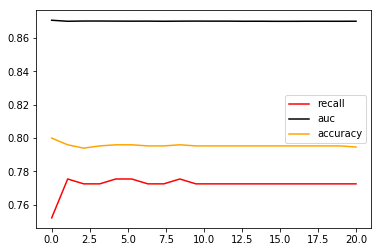

In [119]:
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 1500
              ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

print(max(aucall),C_range[aucall.index(max(aucall))])
plt.figure()
plt.plot(C_range,recallall,c="red",label="recall")
plt.plot(C_range,aucall,c="black",label="auc")
plt.plot(C_range,scoreall,c="orange",label="accuracy")
plt.legend()
plt.show()

可以观察到几个现象。

首先，我们注意到，随着C值逐渐增大，模型的运行速度变得越来越慢。对于SVM这个本来运行就不快的模型来说，巨大的C值会是一个比较危险的消耗。所以正常来说，我们应该设定一个较小的C值范围来进行调整。

其次，C很小的时候，模型的各项指标都很低，但当C到1以上之后，模型的表现开始逐渐稳定，在C逐渐变大之后，模型的效果并没有显著地提高。可以认为我们设定的C值范围太大了，然而再继续增大或者缩小C值的范围，AUC面积也只能够在0.86上下进行变化了，调节C值不能够让模型的任何指标实现质变。

In [120]:
#我们把目前为止最佳的C值带入模型，看看我们的准确率，Recall的具体值
times = time()
clf = SVC(kernel = "linear",C=3.1663157894736838,cache_size = 1500
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.795333,recall is 0.772595', auc is 0.870165
00:03:364038


可以看到，这种情况下模型的准确率，recall和AUC都没有太差，但是也没有太好，这也许就是模型平衡后的一种结果。现在，光是调整支持向量机本身的参数，已经不能够满足我们的需求了，要想让AUC面积更进一步，我们需要绘制ROC曲线，查看我们是否可以通过调整阈值来对这个模型进行改进。

Text(0.5, 0, 'False Positive Rate')

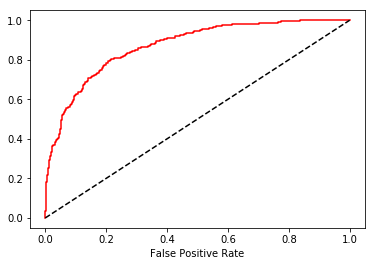

In [123]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)#真实值 置信度 pos_label=1 正样本是1 返回假正率和recall和阈值

area = roc_auc_score(Ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',label='ROC curve (area = %0.2f)' % area) #横坐标假正率 纵坐标recall
plt.plot([0, 1], [0, 1], color='black', linestyle='--') #x=y的线
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')

In [124]:
'''求解最佳阈值'''
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR)) #recall和fpr最大的差值
thresholds[maxindex]

-0.08950517388953827

基于我们选出的最佳阈值，我们来认为确定y_predict，并确定在这个阈值下的recall和准确度的值：

In [129]:
from sklearn.metrics import accuracy_score as AC

from sklearn.metrics import accuracy_score as AC

times = time()

clf = SVC(kernel = "linear",C=3.1663157894736838,cache_size = 1500
          ,class_weight = "balanced"
         ).fit(Xtrain, Ytrain)

prob = pd.DataFrame(clf.decision_function(Xtest))#置信度

In [130]:
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1 #置信度大于最佳阈值 预测值则为1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0 #小于最佳阈值 预测值为0

prob.loc[:,"y_pred"].isnull().sum()

0

In [131]:
prob

,0,y_pred
0,2.189193,1.0
1,0.373116,1.0
2,-0.015488,1.0
3,-1.136262,0.0
4,-0.240851,0.0
5,-1.917667,0.0
6,-1.593002,0.0
7,1.508707,1.0
8,-0.939971,0.0
9,3.081288,1.0


In [132]:
#检查模型本身的准确度
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])

print("testing accuracy %f,recall is %f" % (score,recall))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.789333,recall is 0.804665
01:01:044189


而还不如我们不调整时的效果好。可见，如果我们追求平衡，那SVC本身的结果就已经非常接近最优结果了。调节阈值，调节参数C和调节class_weight都不一定有效果。但整体来看，我们的模型不是一个糟糕的模型，但这个结果如果提交到kaggle参加比赛是绝对不足够的。